In [1]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


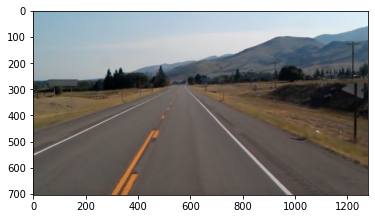

In [3]:
img = cv2.imread('/content/drive/MyDrive/Projects/Computer Vision/Road Lane Detection/Samples/2.png')
rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgbImg)

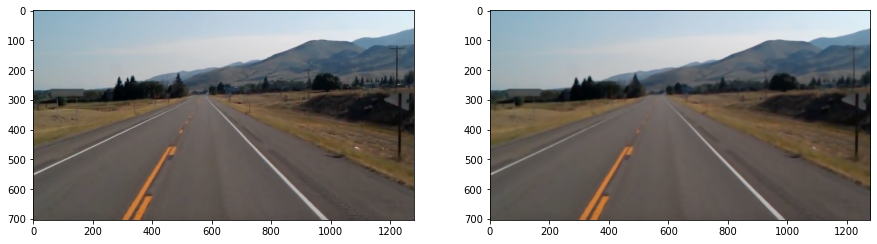

In [4]:
medianImg = cv2.medianBlur(img, ksize=9)

rgbMedianImg = cv2.cvtColor(medianImg, cv2.COLOR_BGR2RGB)

f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(rgbImg)
axarr[1].imshow(rgbMedianImg)

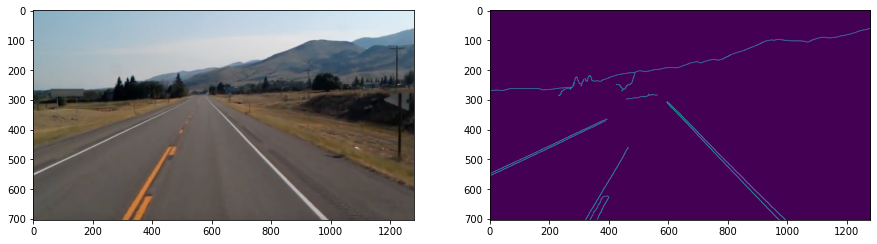

In [5]:
cannyImg = cv2.Canny(medianImg, 30, 255)

f, axarr = plt.subplots(1, 2, figsize=(15,15))

axarr[0].imshow(rgbImg)
axarr[1].imshow(cannyImg)

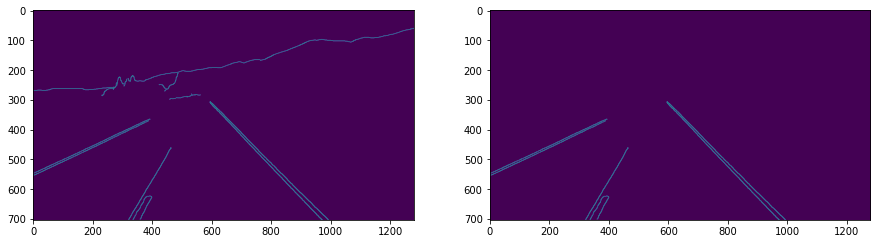

In [6]:
cannyImgROI = cannyImg.copy()
cannyImgROI[0:300] = 0

f, axarr = plt.subplots(1, 2, figsize=(15,15))

axarr[0].imshow(cannyImg)
axarr[1].imshow(cannyImgROI)

In [7]:
maximum_rad = np.sqrt(cannyImg.shape[0] * cannyImg.shape[0] + cannyImg.shape[1] * cannyImg.shape[1])
accumulator = np.zeros((int(maximum_rad), 180))

for x in range(cannyImg.shape[0]):
  for y in range(cannyImg.shape[1]):
    if cannyImg[x][y] == 255:
      for theta in range(180):
        rho = x * np.cos( theta * np.pi/180 ) + y * np.sin( theta * np.pi/180 )
        accumulator[int(rho)][theta] += 1


In [8]:
count = 0

for x in range(accumulator.shape[0]):
  for y in range(accumulator.shape[1]):
    if accumulator[x][y] > 150:
      count += 1
    else:
      accumulator[x][y] = 0

# Comparing to Hough Transform in OpenCV

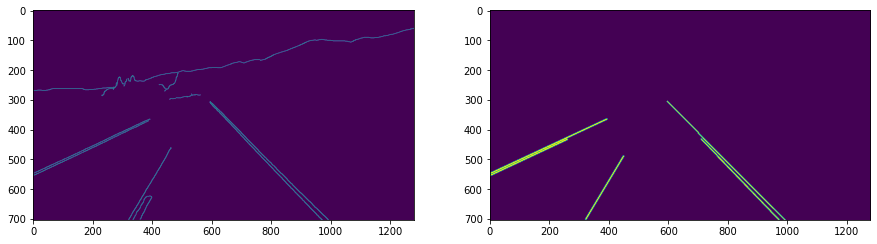

In [9]:
lines = cv2.HoughLinesP(cannyImg, 1, np.pi/180, threshold=150, minLineLength=40, maxLineGap=50)

houghImage = np.zeros(cannyImg.shape)
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(houghImage, (x1, y1), (x2, y2), (255, 255, 255), 3)

f, axarr = plt.subplots(1, 2, figsize=(15,15))

axarr[0].imshow(cannyImg)
axarr[1].imshow(houghImage)

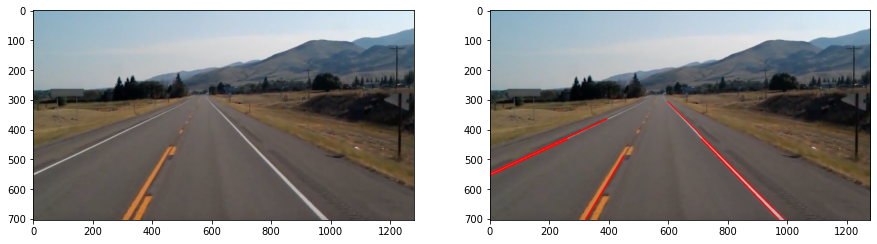

In [10]:
laneDetection = rgbImg.copy()

for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(laneDetection, (x1, y1), (x2, y2), (255, 0, 0), 3)

f, axarr = plt.subplots(1, 2, figsize=(15,15))

axarr[0].imshow(rgbImg)
axarr[1].imshow(laneDetection)